In [51]:
import pandas as np
data = np.read_csv("/content/movie_dataset.csv")
print(data)

      index     budget                                    genres  \
0         0  237000000  Action Adventure Fantasy Science Fiction   
1         1  300000000                  Adventure Fantasy Action   
2         2  245000000                    Action Adventure Crime   
3         3  250000000               Action Crime Drama Thriller   
4         4  260000000          Action Adventure Science Fiction   
...     ...        ...                                       ...   
4798   4798     220000                     Action Crime Thriller   
4799   4799       9000                            Comedy Romance   
4800   4800          0             Comedy Drama Romance TV Movie   
4801   4801          0                                       NaN   
4802   4802          0                               Documentary   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pi

In [52]:
data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [53]:

data["release_date"] = np.to_datetime(data["release_date"], errors='coerce')
data["release_date"] = data["release_date"].fillna(np.Timestamp.min)
data["genres"]=data["genres"].fillna("0")
data["homepage"]=data["homepage"].fillna("0")
data["keywords"]=data["keywords"].fillna("0")
data["overview"]=data["overview"].fillna("0")
data["release_date"]=data["release_date"].fillna("0")
data["runtime"]=data["runtime"].fillna(0)
data["tagline"]=data["tagline"].fillna("0")
data["cast"]=data["cast"].fillna("0")
data["director"]=data["director"].fillna("0")

In [54]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["genres"]=b.fit_transform(data["genres"])
data["homepage"]=b.fit_transform(data["homepage"])
data["keywords"]=b.fit_transform(data["keywords"])
data["overview"]=b.fit_transform(data["overview"])
data["tagline"]=b.fit_transform(data["tagline"])
data["cast"]=b.fit_transform(data["cast"])
data["director"]=b.fit_transform(data["director"])
data["spoken_languages"]=b.fit_transform(data["spoken_languages"])
data["status"]=b.fit_transform(data["status"])
data["title"]=b.fit_transform(data["title"])
data["crew"]=b.fit_transform(data["crew"])
data["overview"]=b.fit_transform(data["overview"])
data["original_title"]=b.fit_transform(data["original_title"])
data["production_companies"]=b.fit_transform(data["production_companies"])
data["original_language"]=b.fit_transform(data["original_language"])
data["crew"]=b.fit_transform(data["crew"])
data["production_countries"]=b.fit_transform(data["production_countries"])
data["release_date"]=b.fit_transform(data["release_date"])


In [55]:
print(data)

      index     budget  genres  homepage      id  keywords  original_language  \
0         0  237000000      60       462   19995      1026                  7   
1         1  300000000     328        57     285      2749                  7   
2         2  245000000      30      1282  206647      3637                  7   
3         3  250000000     131      1379   49026      1078                  7   
4         4  260000000      72       218   49529       366                  7   
...     ...        ...     ...       ...     ...       ...                ...   
4798   4798     220000     137         0    9367      3947                  8   
4799   4799       9000     523         0   72766         0                  7   
4800   4800          0     478       761  231617      1073                  7   
4801   4801          0       0       283  126186         0                  7   
4802   4802          0     597         0   25975      2741                  7   

      original_title  overv

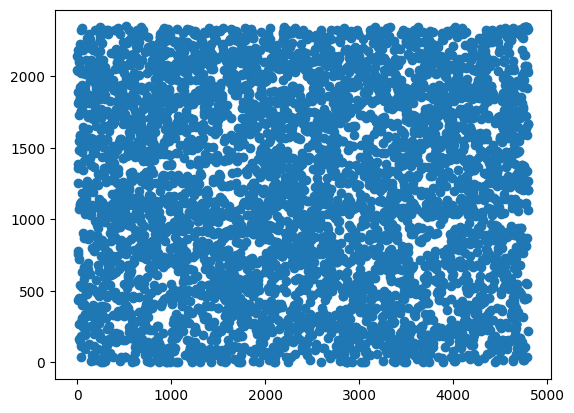

In [56]:
from matplotlib import pyplot as plt
plt.scatter(data["original_title"],data["director"])

In [60]:
x=data.drop("director",axis=1)
y=data["director"]

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
print(xtrain)
print(ytrain)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

      index    budget  genres  homepage      id  keywords  original_language  \
2239   2239  20000000     727         0   10740      2211                  7   
2409   2409    300000     931      1448     948      1422                  7   
2865   2865  12000000    1065      1109  227719      3861                  7   
4638   4638    300000     616         0  378237         0                  7   
2890   2890         0     451         0   61337      2726                  7   
...     ...       ...     ...       ...     ...       ...                ...   
3632   3632   5000000     608         0  343795      1815                  7   
2903   2903   1200000     608         0  345003      3915                  7   
1840   1840  25000000     731       344   77877       408                  7   
2038   2038         0    1112         0   10279      1149                  7   
2050   2050  25000000    1078      1477  287948      3879                  7   

      original_title  overview  popular

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
c=model.predict([[4802,100000087,890,727,12345,5443,7,1542,40567,10.9865,543,231,243,23999965,137.0,382,1,1102,2437,143,4376,9866,1094]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [63]:
print(c)

[1512]


In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[8 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [64]:
from sklearn.metrics import  accuracy_score
print(accuracy_score(ytest,ypred))

0.007284079084287201


In [65]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.03      0.62      0.05         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         2
          49       0.00      0.00      0.00         2
          50       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         1
          55       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_